# PSO


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from sko.PSO import PSO
import numpy as np
from scipy.fft import dct, idct, dctn, idctn
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.weight'] = 'bold' 

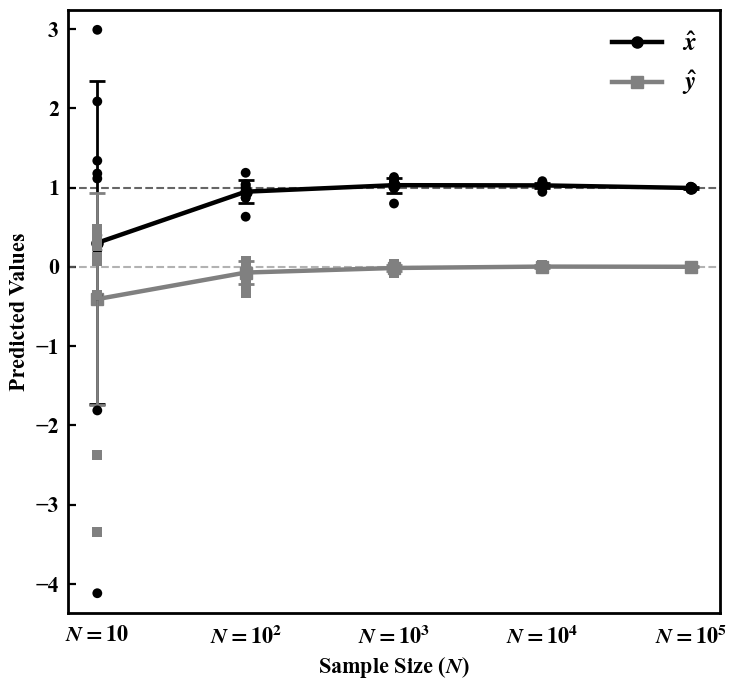

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ---------------------- Global style settings ----------------------
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'Times New Roman'

# ---------------------- Load and clean data ----------------------
df = pd.read_csv("pso_ndct_results_all.csv")

# Ensure numerical values (strip brackets from CSV-exported lists)
df["Best_x"] = (
    df["Best_x"].astype(str)
    .str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False)
    .astype(float)
)
df["Best_y"] = (
    df["Best_y"].astype(str)
    .str.replace("[", "", regex=False)
    .str.replace("]", "", regex=False)
    .astype(float)
)

# ---------------------- Compute mean & std by sample size ----------------------
df_grouped = df.groupby("N", as_index=False).agg(
    mean_x=("Best_x", "mean"),
    std_x=("Best_x", "std"),
    mean_y=("Best_y", "mean"),
    std_y=("Best_y", "std"),
)

# Define x-axis labels (scientific notation)
df_grouped["Experiment"] = [
    r"$\boldsymbol{N=10}$",
    r"$\boldsymbol{N=10^2}$",
    r"$\boldsymbol{N=10^3}$",
    r"$\boldsymbol{N=10^4}$",
    r"$\boldsymbol{N=10^5}$",
]
x = np.arange(len(df_grouped))

# ---------------------- Plot ----------------------
fig, ax = plt.subplots(figsize=(7.5, 7))

# Mean lines (with distinct markers)
ax.plot(x, df_grouped["mean_x"], marker="o", color="black", linewidth=3.2,
        markersize=8, label=r"$\hat{x}$")
ax.plot(x, df_grouped["mean_y"], marker="s", color="gray", linewidth=3.2,
        markersize=8, label=r"$\hat{y}$")

# Error bars
ax.errorbar(x, df_grouped["mean_x"], yerr=df_grouped["std_x"],
            fmt="none", ecolor="black", elinewidth=2, capsize=6, capthick=2)
ax.errorbar(x, df_grouped["mean_y"], yerr=df_grouped["std_y"],
            fmt="none", ecolor="gray", elinewidth=2, capsize=6, capthick=2)

# Scatter points for all individual trials
for i, N_val in enumerate(df_grouped["N"]):
    subset = df[df["N"] == N_val]
    ax.scatter(np.full(len(subset), i), subset["Best_x"],
               color="black", marker="o", s=50, alpha=1,
               edgecolors="none", zorder=3)
    ax.scatter(np.full(len(subset), i), subset["Best_y"],
               color="gray", marker="s", s=50, alpha=1,
               edgecolors="none", zorder=3)

# Reference lines
ax.axhline(1, color="black", linestyle="--", linewidth=1.5, alpha=0.6)  # target x*
ax.axhline(0, color="gray", linestyle="--", linewidth=1.5, alpha=0.6)   # target y*

# Axis labels and limits
ax.set_xticks(x)
ax.set_xticklabels(df_grouped["Experiment"], fontsize=15, family="Times New Roman")
ax.set_xlabel(r"Sample Size ($\boldsymbol{N}$)", fontsize=16, fontweight="bold", family="Times New Roman")
ax.set_ylabel("Predicted Values", fontsize=16, fontweight="bold", family="Times New Roman")

# Dynamic Y-axis range
ymin = min(
    (df_grouped["mean_x"] - df_grouped["std_x"]).min(),
    (df_grouped["mean_y"] - df_grouped["std_y"]).min(),
    df["Best_x"].min(), df["Best_y"].min()
) - 0.25
ymax = max(
    (df_grouped["mean_x"] + df_grouped["std_x"]).max(),
    (df_grouped["mean_y"] + df_grouped["std_y"]).max(),
    df["Best_x"].max(), df["Best_y"].max()
) + 0.25
ax.set_ylim(ymin, ymax)

# Axis styling
ax.tick_params(axis='x', bottom=False, top=False, pad=6, labelsize=16)
ax.tick_params(axis='y', direction='in', which='both',
               labelsize=16, width=1.6, length=6, pad=6)
for spine in ax.spines.values():
    spine.set_linewidth(2)

# Legend
ax.legend(fontsize=18, frameon=False, loc="upper right")

plt.tight_layout()

# Save as publication-quality SVG
save_path = r"D:\lib\gali\Manuscript\figS3\scatter_lines.svg"
plt.savefig(save_path, format="svg", dpi=600, bbox_inches="tight")
plt.show()